In [2]:
import pandas as pd
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df['Gender'].replace(['Male',"Female"],[1,0],inplace = True)

In [4]:
X = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']

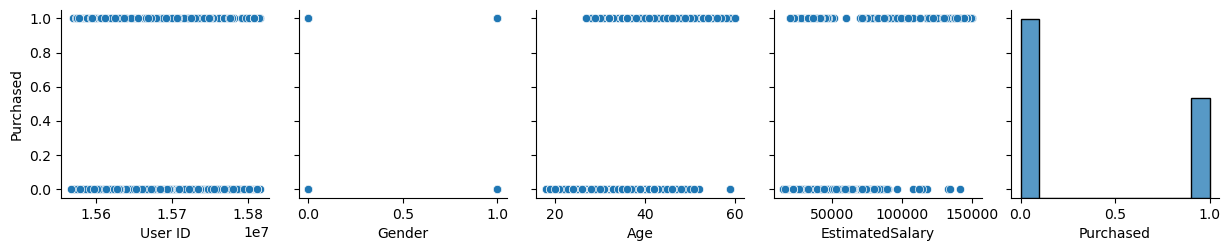

In [5]:
import seaborn as sns
sns.pairplot(df,y_vars=['Purchased'])


In [6]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [10]:
lr.fit(x_train,y_train)

LogisticRegression()

In [11]:
y_test_pred = lr.predict(x_test)

In [12]:
y_train

361    1
44     0
275    1
75     1
295    0
      ..
272    1
355    1
364    1
161    0
215    1
Name: Purchased, Length: 300, dtype: int64

In [13]:
y_test_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm,annot = True)


<AxesSubplot:>

In [15]:
lst = cm.tolist()
# print(lst)
cm_accuracy = (lst[0][0]+lst[1][1])/(100)
print("Accuracy : ",cm_accuracy*100 ,"%")

Accuracy :  84.0 %


In [16]:
cm_error_rate = (lst[0][1]+lst[1][0])/(100)
print("Error Rate : ",cm_error_rate)

Error Rate :  0.16


In [17]:
cm_percision = (lst[0][0])/(lst[0][0]+lst[1][0])
print("Percision : ",cm_percision)

Percision :  0.8611111111111112


In [18]:
cm_recall = (lst[0][0])/(lst[0][0]+lst[1][1])
print("Recall(Sensitivity) : ",cm_recall)

Recall(Sensitivity) :  0.7380952380952381


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.84

In [20]:
lr.score(x_test,y_test)

0.84

In [25]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_test_pred, average=None)
print(ps)

[0.86111111 0.78571429]


In [26]:
from sklearn.metrics import recall_score
rs = recall_score(y_test, y_test_pred, average=None)
print(rs)

[0.91176471 0.6875    ]
